# Data Cleaning and Visualization

### Structure of this Notebook:
- Data Cleaning
- Visualization
- Data Normalization

### 1. First, we will perform data cleaning for our classification and prediction algorithms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
crypto = pd.read_csv("crypto.csv")

In [3]:
#drop useless columns.(They are useless becasuse they are either only a symbol, or time, url, date that are irrelevant to our topic)
#for more information on the columns, please see README file
crypto = crypto.drop(['platform','max_supply','symbol','BTC_price', 'url','timestamp','year','month','day','date','last_updated','date_added','id'], axis=1)

In [4]:
#check nulls
crypto.isnull().sum()



slug                  0
tags                  0
circulating_supply    0
total_supply          0
cmc_rank              0
USD_price             0
dtype: int64

In [5]:
#drop data that has no tags
index_names = crypto[crypto['tags'] == "[]" ].index


In [6]:
crypto =crypto.drop(index_names)


In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
#delete rows that has no circulating supply, this means the crypto's scale is too small to be considered
index_names = crypto[crypto['circulating_supply'] == 0 ].index
crypto =crypto.drop(index_names)
crypto

,slug,tags,circulating_supply,total_supply,cmc_rank,USD_price
0,bitcoin,"['mineable', 'pow', 'sha-256', 'store-of-value...",18831781.00000,18831781.00000,1,"{'price': 48116.941218027736, 'volume_24h': 42..."
1,ethereum,"['mineable', 'pow', 'smart-contracts', 'ethere...",117754628.68650,117754628.68650,2,"{'price': 3307.5160778952013, 'volume_24h': 22..."
2,cardano,"['mineable', 'dpos', 'pos', 'platform', 'resea...",32025787326.65500,33117618880.45300,3,"{'price': 2.25812734841043, 'volume_24h': 3235..."
3,binance-coin,"['marketplace', 'centralized-exchange', 'payme...",168137036.00000,168137036.00000,4,"{'price': 421.6431759496388, 'volume_24h': 216..."
4,tether,"['payments', 'stablecoin', 'stablecoin-asset-b...",68024069674.74080,71385677474.96931,5,"{'price': 1.0001778709897917, 'volume_24h': 81..."
...,...,...,...,...,...,...
2702,concoin,['mineable'],744265.71136,1595265.71136,2703,"{'price': 0.00144424384818, 'volume_24h': 0, '..."
5706,wandx,"['marketplace', 'decentralized-exchange']",12244134.96510,16013284.00000,5707,"{'price': 0, 'volume_24h': 0, 'percent_change_..."
5709,idex-membership,"['marketplace', 'decentralized-exchange']",2000.00000,2000.00000,5710,"{'price': 0, 'volume_24h': 0, 'percent_change_..."
5713,jet8,['marketing'],740485259.10792,1468857774.57777,5714,"{'price': 0, 'volume_24h': 0, 'percent_change_..."


In [9]:
#formatting
import json

for i, row in crypto.iterrows():
    crypto.at[i,'USD_price']=crypto.at[i,'USD_price'].replace('\'', '\"')



In [10]:
json.loads(crypto['USD_price'][0])
#crypto['USD_price'] =crypto['USD_price'] .apply(lambda x: json.loads(x), axis=1)

for i, row in crypto.iterrows():
    crypto.at[i,'USD_price']=json.loads(crypto['USD_price'][i])

In [11]:
#create new columns with the USD price column
crypto =crypto.join(crypto['USD_price'].apply(pd.Series))

In [12]:
#delete rows that have no 7 day percent change
index_names = crypto[crypto['percent_change_7d'] == 0.00000 ].index
crypto =crypto.drop(index_names)

In [13]:
#delete rows with no volume
index_names = crypto[crypto['volume_24h'] == 0.00000 ].index
crypto =crypto.drop(index_names)



In [14]:
crypto.describe()

,circulating_supply,total_supply,cmc_rank,price,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,market_cap
count,1669.00000,1669.00000,1669.00000,1669.00000,1669.00000,1669.00000,1669.00000,1669.00000,1669.00000
mean,34324940456351.43750,36848572112210.69531,1113.81845,384.21867,136670211.04472,0.63628,8.60953,7.28064,1285085371.05098
std,1039643980962630.50000,1041057936969837.87500,738.28524,4697.51489,2336254691.70559,5.04705,21.35992,36.34104,24424226921.98899
min,41.99995,0.00000,1.00000,0.00000,0.01000,-41.73516,-92.44022,-98.44526,1430.56846
25%,12030988.00000,21213630.83900,475.00000,0.01122,13759.17000,-0.00503,3.15846,-4.34242,1243368.80166
50%,68971718.00000,150000000.00000,1025.00000,0.14116,315078.42000,0.30401,8.00066,4.21326,8913192.47663
75%,491820906.37900,1000000000.00000,1700.00000,1.19575,4306278.40000,0.91708,11.70574,12.36928,65025109.04242
max,39272750153123072.00000,39272750153123072.00000,2698.00000,101097.06889,81411630527.39000,108.09063,413.13180,661.11700,906127699407.77161


In [15]:
#create dummies
for i, row in crypto.iterrows():
    crypto.at[i,'tags']=crypto.at[i,'tags'].strip('][').split(', ')


In [16]:

crypto.join(pd.get_dummies(crypto["tags"].apply(pd.Series).stack()).sum(level=0))


,slug,tags,circulating_supply,total_supply,cmc_rank,USD_price,price,volume_24h,percent_change_1h,percent_change_24h,...,'wrapped-tokens','x11','x11gost','x13','xevan','yearn-partnerships','yescript','yield-aggregator','yield-farming','zero-knowledge-proofs'
0,bitcoin,"['mineable', 'pow', 'sha-256', 'store-of-value...",18831781.00000,18831781.00000,1,"{'price': 48116.941218027736, 'volume_24h': 42...",48116.94122,42850641581.55000,0.27115,9.87887,...,0,0,0,0,0,0,0,0,0,0
1,ethereum,"['mineable', 'pow', 'smart-contracts', 'ethere...",117754628.68650,117754628.68650,2,"{'price': 3307.5160778952013, 'volume_24h': 22...",3307.51608,22307625572.73000,0.69644,10.18886,...,0,0,0,0,0,0,0,0,0,0
2,cardano,"['mineable', 'dpos', 'pos', 'platform', 'resea...",32025787326.65500,33117618880.45300,3,"{'price': 2.25812734841043, 'volume_24h': 3235...",2.25813,3235813426.57000,1.31149,6.79492,...,0,0,0,0,0,0,0,0,0,0
3,binance-coin,"['marketplace', 'centralized-exchange', 'payme...",168137036.00000,168137036.00000,4,"{'price': 421.6431759496388, 'volume_24h': 216...",421.64318,2162493377.68000,1.32330,8.93558,...,0,0,0,0,0,0,0,0,0,0
4,tether,"['payments', 'stablecoin', 'stablecoin-asset-b...",68024069674.74080,71385677474.96931,5,"{'price': 1.0001778709897917, 'volume_24h': 81...",1.00018,81411630527.39000,-0.00577,0.00232,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,dinero,"['mineable', 'masternodes']",8947928.76911,10947933.76911,2688,"{'price': 0.00033699023124262163, 'volume_24h'...",0.00034,11.05000,0.29110,9.96587,...,0,0,0,0,0,0,0,0,0,0
2691,mox,['mineable'],5027488.00000,5027488.00000,2692,"{'price': 0.00048141461606088806, 'volume_24h'...",0.00048,0.49000,0.29110,-45.01706,...,0,0,0,0,0,0,0,0,0,0
2694,argus,"['mineable', 'hybrid-pow-pos', 'scrypt']",1148324.04800,5194373.04800,2695,"{'price': 0.001444243848182664, 'volume_24h': ...",0.00144,0.01000,0.29110,9.96587,...,0,0,0,0,0,0,0,0,0,0
2696,ouroboros,['cosmos-ecosystem'],31296748.74020,77343806.33650,2697,"{'price': 4.8e-05, 'volume_24h': 7137.19, 'per...",0.00005,7137.19000,37.14286,54.83871,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#delete columns that have unpopular tags
new_columns = pd.get_dummies(crypto["tags"].apply(pd.Series).stack()).sum(level=0)
new_columns.columns
for i in new_columns.columns:
    
    if(np.mean(new_columns[i]) < 0.07):
        new_columns =new_columns.drop(i, axis =1)
new_columns

,'binance-smart-chain','collectibles-nfts','defi','mineable','platform'
0,0,0,0,1,0
1,1,0,0,1,0
2,1,0,0,1,1
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2687,0,0,0,1,0
2691,0,0,0,1,0
2694,0,0,0,1,0
2696,0,0,0,0,0


In [18]:
crypto =crypto.join(new_columns)

In [19]:
#use a supply percentage instead
crypto["circulating/total_supply"]=crypto['circulating_supply']/crypto['total_supply']

In [20]:
#drop duplicate columns
crypto = crypto.drop(['last_updated','circulating_supply','total_supply', 'USD_price','tags','percent_change_1h','percent_change_24h' ], axis=1)

In [21]:
crypto

,slug,cmc_rank,price,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable','platform',circulating/total_supply
0,bitcoin,1,48116.94122,42850641581.55000,12.31844,906127699407.77161,0,0,0,1,0,1.00000
1,ethereum,2,3307.51608,22307625572.73000,12.82023,389475327627.17822,1,0,0,1,0,1.00000
2,cardano,3,2.25813,3235813426.57000,-1.01443,72318306216.69580,1,0,0,1,1,0.96703
3,binance-coin,4,421.64318,2162493377.68000,18.66701,70893833853.79875,1,0,0,0,0,1.00000
4,tether,5,1.00018,81411630527.39000,-0.06420,68036169183.34351,1,0,0,0,0,0.95291
...,...,...,...,...,...,...,...,...,...,...,...,...
2687,dinero,2688,0.00034,11.05000,12.36928,3015.36459,0,0,0,1,0,0.81732
2691,mox,2692,0.00048,0.49000,12.36928,2420.30621,0,0,0,1,0,1.00000
2694,argus,2695,0.00144,0.01000,-32.57843,1658.45994,0,0,0,1,0,0.22107
2696,ouroboros,2697,0.00005,7137.19000,-46.66667,1502.24394,0,0,0,0,0,0.40464


In [22]:
# finding the infinite values
crypto.iloc[crypto.values==np.inf]

,slug,cmc_rank,price,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable','platform',circulating/total_supply
410,radix,411,0.11819,3393121.86000,12.78619,86853628.64458,0,0,0,0,0,inf
933,nerve-finance,934,0.24705,660117.18000,-19.67606,11422854.03675,1,0,1,0,0,inf
999,opium,1000,2.32221,107179825.53000,6.51903,9663189.51991,0,0,1,0,0,inf
1146,public-mint,1147,0.34952,170868.79000,-6.68989,6094687.39087,0,0,0,0,0,inf
2577,kebab-token,2578,0.02000,9.38000,-0.07367,21620.89235,1,0,0,0,0,inf


In [23]:
# drop the infinite values for analysis, to do this we first replace inf with NaN
crypto.replace([np.inf, -np.inf], np.nan, inplace=True)
crypto = crypto.dropna()

In [24]:
crypto.isnull().sum()

slug                        0
cmc_rank                    0
price                       0
volume_24h                  0
percent_change_7d           0
market_cap                  0
'binance-smart-chain'       0
'collectibles-nfts'         0
'defi'                      0
'mineable'                  0
'platform'                  0
circulating/total_supply    0
dtype: int64

In [25]:
#doublecheck if there are still infinte values
crypto.iloc[crypto.values==np.inf]

,slug,cmc_rank,price,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable','platform',circulating/total_supply


In [26]:
crypto

,slug,cmc_rank,price,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable','platform',circulating/total_supply
0,bitcoin,1,48116.94122,42850641581.55000,12.31844,906127699407.77161,0,0,0,1,0,1.00000
1,ethereum,2,3307.51608,22307625572.73000,12.82023,389475327627.17822,1,0,0,1,0,1.00000
2,cardano,3,2.25813,3235813426.57000,-1.01443,72318306216.69580,1,0,0,1,1,0.96703
3,binance-coin,4,421.64318,2162493377.68000,18.66701,70893833853.79875,1,0,0,0,0,1.00000
4,tether,5,1.00018,81411630527.39000,-0.06420,68036169183.34351,1,0,0,0,0,0.95291
...,...,...,...,...,...,...,...,...,...,...,...,...
2687,dinero,2688,0.00034,11.05000,12.36928,3015.36459,0,0,0,1,0,0.81732
2691,mox,2692,0.00048,0.49000,12.36928,2420.30621,0,0,0,1,0,1.00000
2694,argus,2695,0.00144,0.01000,-32.57843,1658.45994,0,0,0,1,0,0.22107
2696,ouroboros,2697,0.00005,7137.19000,-46.66667,1502.24394,0,0,0,0,0,0.40464


### 2. Data Visualization

1) First lets look at our target variable for prediction: price

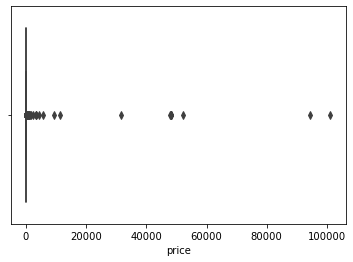

In [27]:
ax = sns.boxplot(x=crypto["price"])

In [28]:
#since there is a huge range for crypto currencies, 
#we decided to only deal with those that have a value less than 500. 
print(np.where(crypto['price']>500))
for i, row in crypto.iterrows():
    if crypto.at[i,'price'] > 500:
        crypto.at[i,'price']= np.nan

crypto.isnull().sum()


(array([   0,    1,   17,   18,   33,   53,   81,  104,  155,  191,  193,
        219,  262,  320,  322,  337,  357,  385,  453,  466,  471,  573,
        586,  595,  701,  926,  929,  936,  988, 1061, 1067, 1178, 1265,
       1325, 1444, 1448]),)


slug                         0
cmc_rank                     0
price                       36
volume_24h                   0
percent_change_7d            0
market_cap                   0
'binance-smart-chain'        0
'collectibles-nfts'          0
'defi'                       0
'mineable'                   0
'platform'                   0
circulating/total_supply     0
dtype: int64

In [29]:
crypto =crypto.dropna()

In [30]:
crypto

,slug,cmc_rank,price,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable','platform',circulating/total_supply
2,cardano,3,2.25813,3235813426.57000,-1.01443,72318306216.69580,1,0,0,1,1,0.96703
3,binance-coin,4,421.64318,2162493377.68000,18.66701,70893833853.79875,1,0,0,0,0,1.00000
4,tether,5,1.00018,81411630527.39000,-0.06420,68036169183.34351,1,0,0,0,0,0.95291
5,xrp,6,1.04262,5125674348.85000,10.22274,48743111955.38675,0,0,0,0,0,0.46755
6,solana,7,161.68237,4387488319.89000,15.98811,48133442239.44215,0,0,0,0,1,0.58913
...,...,...,...,...,...,...,...,...,...,...,...,...
2687,dinero,2688,0.00034,11.05000,12.36928,3015.36459,0,0,0,1,0,0.81732
2691,mox,2692,0.00048,0.49000,12.36928,2420.30621,0,0,0,1,0,1.00000
2694,argus,2695,0.00144,0.01000,-32.57843,1658.45994,0,0,0,1,0,0.22107
2696,ouroboros,2697,0.00005,7137.19000,-46.66667,1502.24394,0,0,0,0,0,0.40464


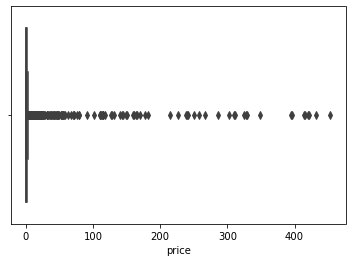

In [31]:
#box plot of price, it is more balanced
ax = sns.boxplot(x=crypto["price"])

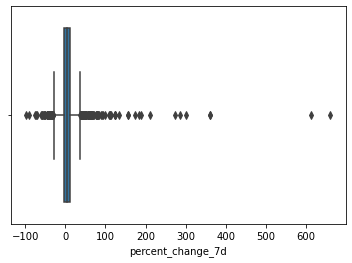

In [32]:
#box plot of percent_change_7d, they are relevant because they are all input variables for our model later
ax = sns.boxplot(x=crypto["percent_change_7d"])

We can see that  many of the cryptocurrency are quite volatile, with some 7-day percentage change in price even up to 300 ~ 600%. 

This is consistent with the general knowledge about cryptocurrency - having more variance than stocks. Investors of cryptocurrencies typically have high risk tolerance


In [33]:
crypto["circulating/total_supply"].describe()

count   1628.00000
mean       0.64389
std        1.16658
min        0.00005
25%        0.28004
50%        0.67172
75%        0.99746
max       45.55815
Name: circulating/total_supply, dtype: float64

In [34]:
crypto['volume_24h'].describe()

count          1628.00000
mean       98602493.55204
std      2041956423.58386
min               0.01000
25%           13686.17750
50%          307441.83000
75%         4015957.22500
max     81411630527.39000
Name: volume_24h, dtype: float64

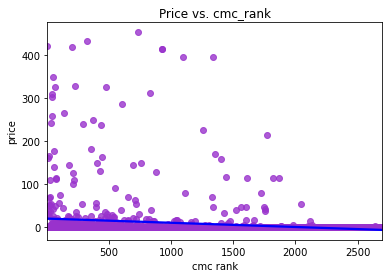

In [35]:
sns.regplot(x="cmc_rank",y="price",data=crypto, ci=None, order=1, 
            scatter_kws={"color": "darkorchid"}, 
            line_kws={"color": "blue"}).set(title='Price vs. cmc_rank',
                                            xlabel='cmc rank',
                                            ylabel = 'price')
plt.show()

In this graph we want to explore the possible relationship between cmc rank and price. We can see from the trend the higher the rank, the higher the prices are.  This is helpful for us to gain some prior knowledge of the variables before doing prediction and classification.

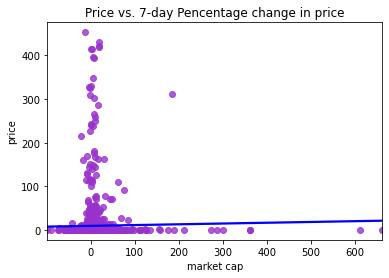

In [36]:
sns.regplot(x="percent_change_7d",y="price",data=crypto, ci=None, order=1, 
            scatter_kws={"color": "darkorchid"}, 
            line_kws={"color": "blue"}).set(title='Price vs. 7-day Pencentage change in price',
                                            xlabel='market cap',
                                            ylabel = 'price')
plt.show()

In this graph we want to explore the possible relationship between price and percent_change_7d. We can see from the trend the higherin range, the higher the prices are. This is helpful for us to gain some prior knowledge of the variables before doing prediction and classification.

By inspecting the data structure of our columns, we decided that in order to make viable models, we need to normalize a lot of this data. 

#### Here we look at the correlation of the data

In [37]:
corr = crypto.corr()
corr

,cmc_rank,price,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable','platform',circulating/total_supply
cmc_rank,1.00000,-0.16383,-0.07111,0.02971,-0.18747,-0.08438,-0.04400,-0.24418,0.30544,-0.14916,0.00547
price,-0.16383,1.00000,0.01897,0.01496,0.17652,0.03887,0.03487,0.10394,-0.04920,-0.03624,0.01403
volume_24h,-0.07111,0.01897,1.00000,-0.00263,0.53309,0.05818,-0.00996,-0.01072,-0.01363,0.00144,0.00799
percent_change_7d,0.02971,0.01496,-0.00263,1.00000,-0.00072,0.00720,0.00526,0.00909,0.05863,-0.03446,0.01868
market_cap,-0.18747,0.17652,0.53309,-0.00072,1.00000,0.10647,-0.03010,-0.00642,0.00126,0.07157,0.01467
'binance-smart-chain',-0.08438,0.03887,0.05818,0.00720,0.10647,1.00000,0.07856,0.14311,-0.19694,-0.06484,-0.05925
'collectibles-nfts',-0.04400,0.03487,-0.00996,0.00526,-0.03010,0.07856,1.00000,-0.02059,-0.14238,-0.05532,-0.05229
'defi',-0.24418,0.10394,-0.01072,0.00909,-0.00642,0.14311,-0.02059,1.00000,-0.20368,-0.08230,-0.04733
'mineable',0.30544,-0.04920,-0.01363,0.05863,0.00126,-0.19694,-0.14238,-0.20368,1.00000,-0.02418,0.09079
'platform',-0.14916,-0.03624,0.00144,-0.03446,0.07157,-0.06484,-0.05532,-0.08230,-0.02418,1.00000,0.01320


No two columns have significant correlation

### 3. Data Normalization

In [38]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [39]:
crypto = crypto.set_index('slug')

In [40]:
wip_crypto = crypto.copy() #savepoint

In [41]:
#Performing normalization to a scale of  0 -100

from sklearn import preprocessing
temp=crypto.drop(columns=["'platform'"])
# dropping the columns because slug is just the name of the coin, and platform is irrelevant variable in our analysis
# more on README file about the columns 
Y = temp['price']

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 100))
a=temp.drop(columns=['price'])
X_scaled = min_max_scaler.fit_transform(a)
X = pd.DataFrame(X_scaled,columns =a.columns,index = a.index)


In [42]:
X

,cmc_rank,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable',circulating/total_supply
slug,,,,,,,,,
cardano,0.00000,3.97463,12.82723,100.00000,100.00000,0.00000,0.00000,100.00000,2.12253
binance-coin,0.03711,2.65625,15.41839,98.03027,100.00000,0.00000,0.00000,0.00000,2.19489
tether,0.07421,100.00000,12.95234,94.07876,100.00000,0.00000,0.00000,0.00000,2.09153
xrp,0.11132,6.29600,14.30666,67.40079,0.00000,0.00000,0.00000,0.00000,1.02617
solana,0.14842,5.38926,15.06570,66.55776,0.00000,0.00000,0.00000,0.00000,1.29304
...,...,...,...,...,...,...,...,...,...
dinero,99.62894,0.00000,14.58926,0.00000,0.00000,0.00000,0.00000,100.00000,1.79390
mox,99.77737,0.00000,14.58926,0.00000,0.00000,0.00000,0.00000,100.00000,2.19489
argus,99.88868,0.00000,8.67168,0.00000,0.00000,0.00000,0.00000,100.00000,0.48514


In [43]:
Y

slug
cardano          2.25813
binance-coin   421.64318
tether           1.00018
xrp              1.04262
solana         161.68237
                  ...   
dinero           0.00034
mox              0.00048
argus            0.00144
ouroboros        0.00005
kz-cash          0.00091
Name: price, Length: 1628, dtype: float64

In [44]:
crypto1 = crypto.copy()
crypto2 = X.copy()

In [45]:
 crypto2['price']=Y.values.tolist()

In [46]:
 crypto2.isnull().sum()

cmc_rank                    0
volume_24h                  0
percent_change_7d           0
market_cap                  0
'binance-smart-chain'       0
'collectibles-nfts'         0
'defi'                      0
'mineable'                  0
circulating/total_supply    0
price                       0
dtype: int64

In [47]:
X

,cmc_rank,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable',circulating/total_supply
slug,,,,,,,,,
cardano,0.00000,3.97463,12.82723,100.00000,100.00000,0.00000,0.00000,100.00000,2.12253
binance-coin,0.03711,2.65625,15.41839,98.03027,100.00000,0.00000,0.00000,0.00000,2.19489
tether,0.07421,100.00000,12.95234,94.07876,100.00000,0.00000,0.00000,0.00000,2.09153
xrp,0.11132,6.29600,14.30666,67.40079,0.00000,0.00000,0.00000,0.00000,1.02617
solana,0.14842,5.38926,15.06570,66.55776,0.00000,0.00000,0.00000,0.00000,1.29304
...,...,...,...,...,...,...,...,...,...
dinero,99.62894,0.00000,14.58926,0.00000,0.00000,0.00000,0.00000,100.00000,1.79390
mox,99.77737,0.00000,14.58926,0.00000,0.00000,0.00000,0.00000,100.00000,2.19489
argus,99.88868,0.00000,8.67168,0.00000,0.00000,0.00000,0.00000,100.00000,0.48514


In [48]:
Y

slug
cardano          2.25813
binance-coin   421.64318
tether           1.00018
xrp              1.04262
solana         161.68237
                  ...   
dinero           0.00034
mox              0.00048
argus            0.00144
ouroboros        0.00005
kz-cash          0.00091
Name: price, Length: 1628, dtype: float64

In [49]:
crypto2

,cmc_rank,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable',circulating/total_supply,price
slug,,,,,,,,,,
cardano,0.00000,3.97463,12.82723,100.00000,100.00000,0.00000,0.00000,100.00000,2.12253,2.25813
binance-coin,0.03711,2.65625,15.41839,98.03027,100.00000,0.00000,0.00000,0.00000,2.19489,421.64318
tether,0.07421,100.00000,12.95234,94.07876,100.00000,0.00000,0.00000,0.00000,2.09153,1.00018
xrp,0.11132,6.29600,14.30666,67.40079,0.00000,0.00000,0.00000,0.00000,1.02617,1.04262
solana,0.14842,5.38926,15.06570,66.55776,0.00000,0.00000,0.00000,0.00000,1.29304,161.68237
...,...,...,...,...,...,...,...,...,...,...
dinero,99.62894,0.00000,14.58926,0.00000,0.00000,0.00000,0.00000,100.00000,1.79390,0.00034
mox,99.77737,0.00000,14.58926,0.00000,0.00000,0.00000,0.00000,100.00000,2.19489,0.00048
argus,99.88868,0.00000,8.67168,0.00000,0.00000,0.00000,0.00000,100.00000,0.48514,0.00144


In [50]:
crypto2.to_csv('crypto_cleaned_final.csv', encoding='utf-8', index=True)

### Reference：
https://stackoverflow.com/questions/41981441/keep-pandas-index-while-applying-sklearn

https://coinmarketcap.com/historical/20211001/

